In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
# build_features(task='sa')
# build_features(task='olid')

In [3]:
# sa_features = pd.read_csv('./features/nv-ratio-sa.txt', sep='\t')
# olid_features = pd.read_csv('./features/nv-ratio-olid.txt', sep='\t')

In [4]:
features = pd.read_csv('./features-news/pos-ratio.csv')

In [5]:
features.sort_values(by='pron')

,lang,noun,pron,verb,noun2verb,pron2noun
0,ara,0.442545,0.004390,0.101444,0.813518,0.009822
7,jpn,0.376245,0.004974,0.106034,0.780139,0.013048
8,kor,0.342130,0.006484,0.066947,0.836345,0.018599
15,zho,0.551108,0.018713,0.113059,0.829773,0.032840
4,fas,0.550826,0.021052,0.059651,0.902287,0.036812
13,tam,0.473732,0.028432,0.141764,0.769676,0.056618
14,tur,0.390962,0.031069,0.256611,0.603734,0.073617
9,nld,0.224220,0.036318,0.148487,0.601599,0.139396
5,fra,0.296398,0.040701,0.111801,0.726112,0.120739
11,pol,0.325665,0.042144,0.108405,0.750259,0.114580


In [6]:
# df = pd.concat([sa_features, olid_features])

In [7]:
# groups = df.groupby('task')
# fig, ax = plt.subplots(figsize=(12, 12))
# plt.xlim(-0.05, 1.05)
# plt.ylim(-0.05, 1.05)
# for name, group in groups:
#     ax.plot(group.noun, 
#             group.verb, 
#             marker='o', 
#             linestyle='',
#             label=name)
#     lang = group.lang
#     for i, lang_name in enumerate(lang):
#         if name == 'olid':
#             ax.annotate(lang_name, (group.noun[i]-0.01, group.verb[i] + 0.01),
#                         fontsize=14)
#         elif lang_name == 'spa':
#             ax.annotate(lang_name, (group.noun[i]-0.025, group.verb[i]-0.015),
#                         fontsize=14)
#         else:
#             ax.annotate(lang_name, (group.noun[i]+ 0.005, group.verb[i]-0.01),
#                         fontsize=14)
# ax.legend(fontsize=16, loc='upper right')
# ax.set_xlabel('Pronoun-token Ratio', fontdict={'size':16})
# ax.set_ylabel('Verb-token Ratio', fontdict={'size':16})
# plt.savefig('pron_verb_ratio_plot.png')
# plt.show()

In [8]:
map_name = {
    'pron': 'Pronoun',
    'verb': 'Verb'
}

In [13]:
def plot_pos(feature_df, out_file, x='pron', y='verb'):
    lang = feature_df['lang']
    x_ratio = feature_df[x]
    y_ratio = feature_df[y]
    x_name = map_name[x]
    y_name = map_name[y]
    fig, ax = plt.subplots(figsize=(14, 12))
    plt.xlim(0, max(x_ratio) + min(x_ratio))
    plt.ylim(0, max(y_ratio) + min(y_ratio))
    ax.scatter(x_ratio, y_ratio)
    for i, lang_name in enumerate(lang):
        ax.annotate(lang_name, (x_ratio[i], y_ratio[i]), fontsize=20) # to adjust lang label size
    ax.set_xlabel(f'{x_name}-token Ratio', fontdict={'size':20}) # to adjust x-axis label size
    ax.set_ylabel(f'{y_name} Ratio', fontdict={'size':20}) # to adjust y-axis label size
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.savefig(out_file)
    plt.show()

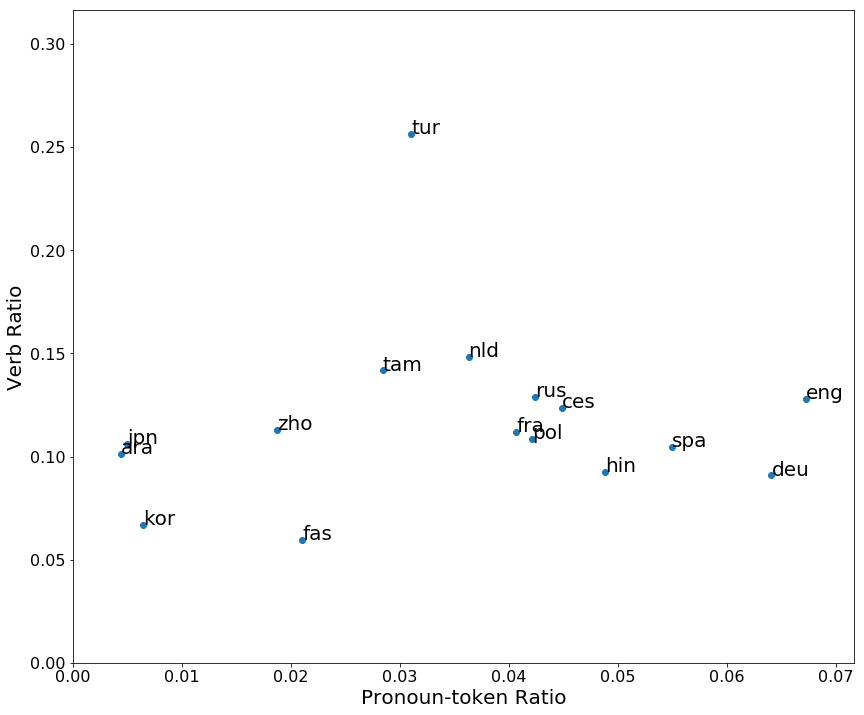

In [14]:
plot_pos(features, './figures/pron2verb-ratio.png')